<center><p float="center">

<h1><center>Loan Approval Prediction Case Study</center></h1>

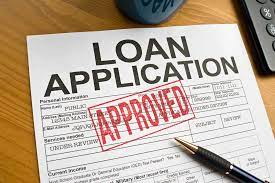

### Objective

In this case study my objective is to predict the likelihood of loan approval based on the given features. For this purpose I have used the loan approval dataset from Kaggle. This dataset is a collection of financial records and associated information used to determine the eligibility of individuals for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status.

### Dataset

* loan_id: Unique IDs
* no_of_dependents: Number of Dependents of the Applicant
* education: Education level of the Applicant
* self_employed: Employment Status of the Applicant, whether self-employed(=Yes), or not
* income_annum: Annual Income of the Applicant
* loan_amount: Loan Amount applied for
* loan_term: Loan Term in Years
* cibil_score: Credit Score of the applicant
* residential_assets_value: Monetary valuation of residential propertie(s) of the applicant. Negative values implies the    applicant is staying on rent
* commercial_assets_value: Monetary valuation of commercial propertie(s) of the applicant
* luxury_assets_value: Monetary valuation of luxury propertie(s) of the applicant
* bank_asset_value: Valuation of total assets in bank account(s) of the applicant
* loan_status: Status of loan, whether Approved or Rejected

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression

### Loading the data

In [2]:
warnings.simplefilter("ignore", ConvergenceWarning)

In [3]:
data = pd.read_csv("loan_approval_dataset.csv")

In [4]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

In [5]:
#Removing restrictions on the number of rows and columns displayed

# Setting the limit for the number of displayed rows
pd.set_option("display.max_rows", 50)
# Removing the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

### Overview of the data

In [6]:
df.shape

(4269, 13)

* The dataset has 4269 rows and 13 columns

In [7]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [8]:
#loan_id is just index, and not useful for my purpose
df.drop(columns=['loan_id'], inplace=True)

In [9]:
df.shape

(4269, 12)

In [10]:
#Coulmns in this dataset has trailing or leading whitespaces, first removing them
df.columns = df.columns.str.strip()

In [11]:
df['loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64

 So the dependent variable 'loan_status' has two categories. Let's One Hot Encode it.

In [12]:
df = pd.get_dummies(df,columns=['loan_status'])

In [13]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status_ Approved,loan_status_ Rejected
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,1
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,1
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1


In [14]:
df.drop(columns=df.columns[-1], inplace=True)

In [15]:
df.rename(columns={'loan_status_ Approved':'loan_status'},inplace=True)

In [16]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


### Doing train test split

In [17]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
3404,4,Not Graduate,No,2800000,8300000,14,381,3200000,1100000,9100000,1500000
781,3,Not Graduate,Yes,9900000,20400000,4,865,26300000,3600000,36500000,12800000
3002,4,Graduate,Yes,3500000,10700000,8,883,200000,2300000,8400000,2000000
4047,3,Not Graduate,No,6400000,23000000,8,520,12100000,11400000,16000000,3800000
3391,2,Graduate,Yes,3300000,6700000,8,845,1300000,4600000,12300000,3200000


In [20]:
X_train.shape

(2988, 11)

In [21]:
print("y_train name:", y_train.name)

y_train name: loan_status


In [22]:
y_train.shape

(2988,)

### Building the column transformers for the data pipeline

#### Let's look at the columns one by one and see do they need transformations, and if yes, then what kind of.

In [23]:
X_train['no_of_dependents'].value_counts()

0    524
4    520
3    519
1    514
2    488
5    423
Name: no_of_dependents, dtype: int64

In [24]:
X_train['education'].value_counts()

 Graduate        1505
 Not Graduate    1483
Name: education, dtype: int64

In [25]:
X_train['self_employed'].value_counts()

 Yes    1516
 No     1472
Name: self_employed, dtype: int64

* These 3 are categorical columns, so can be OneHot Encoded

In [26]:
trf_1 = ColumnTransformer(
    [('Ohe_dep_educ_emp',OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first'),[3,4,5])],
    remainder='passthrough')

* It is clear that the scale of loan_term and cibil_score is very different from that of income_annum,loan_amount and the asset values. So let's first standardize them

In [27]:
trf_2 = ColumnTransformer([('Standardization',StandardScaler(),[7,8,9,10,11,12,13,14])],remainder='passthrough')

Text(0.5, 1.0, 'bank_assets')

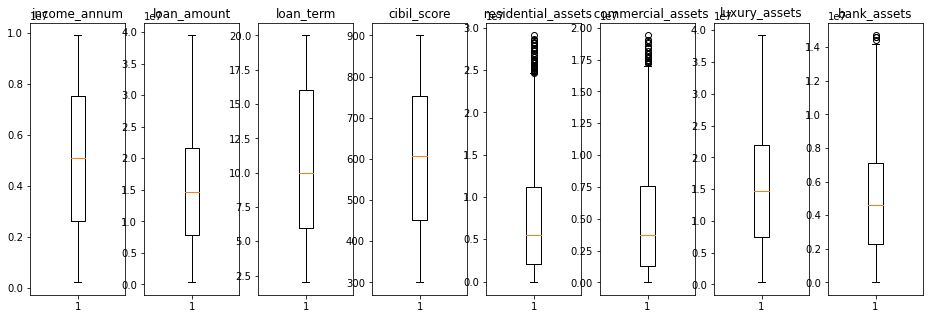

In [28]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(ncols=8, figsize=(16, 5))

ax1.boxplot(X_train['income_annum'])
ax2.boxplot(X_train['loan_amount'])
ax3.boxplot(X_train['loan_term'])
ax4.boxplot(X_train['cibil_score'])
ax5.boxplot(X_train['residential_assets_value'])
ax6.boxplot(X_train['commercial_assets_value'])
ax7.boxplot(X_train['luxury_assets_value'])
ax8.boxplot(X_train['bank_asset_value'])
ax1.set_title("income_annum")
ax2.set_title("loan_amount")
ax3.set_title("loan_term")
ax4.set_title("cibil_score")
ax5.set_title("  residential_assets")
ax6.set_title("  commercial_assets")
ax7.set_title("luxury_assets")
ax8.set_title("bank_assets")

* 3 columns 'residential_assets_value','commercial_assets_value','bank_assets_value' seems to have outliers on the higher side, while the rest don't

* I will use capping for taking care of the outliers

In [29]:
def cap_outliers(X):
    for col in X.columns:
        X[col] = np.where(X[col] > X[col].quantile(0.75), X[col].quantile(0.75), X[col])
    return X

In [30]:
trf_3 = ColumnTransformer(
    [('outlier_capping', FunctionTransformer(cap_outliers), [7, 8, 10])],remainder='passthrough') 

Text(0.5, 1.0, 'bank_assets')

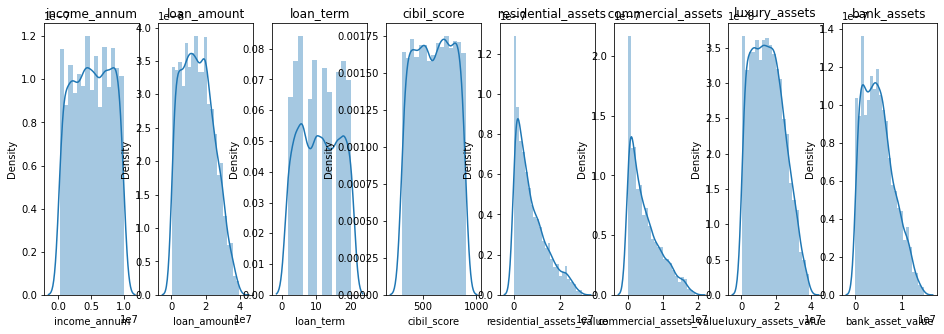

In [31]:
#Let's check if the columns are normally distributed
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(ncols=8, figsize=(16, 5))

sns.distplot(X_train['income_annum'], ax=ax1)
sns.distplot(X_train['loan_amount'], ax=ax2)
sns.distplot(X_train['loan_term'], ax=ax3)
sns.distplot(X_train['cibil_score'], ax=ax4)
sns.distplot(X_train['residential_assets_value'], ax=ax5)
sns.distplot(X_train['commercial_assets_value'], ax=ax6)
sns.distplot(X_train['luxury_assets_value'], ax=ax7)
sns.distplot(X_train['bank_asset_value'], ax=ax8)
ax1.set_title("income_annum")
ax2.set_title("loan_amount")
ax3.set_title("loan_term")
ax4.set_title("cibil_score")
ax5.set_title("  residential_assets")
ax6.set_title("  commercial_assets")
ax7.set_title("luxury_assets")
ax8.set_title("bank_assets")

In [32]:
X_train.skew()

no_of_dependents            0.027206
income_annum               -0.026393
loan_amount                 0.290417
loan_term                   0.022310
cibil_score                -0.016232
residential_assets_value    1.014669
commercial_assets_value     0.961329
luxury_assets_value         0.307668
bank_asset_value            0.543869
dtype: float64

* Making a copy of X_train and seeing which transformation works best

In [33]:
pt = PowerTransformer(method='yeo-johnson')

In [34]:
#making a copy of X_train for checking the effect of transformation
X_train_transformed = X_train.copy()

In [35]:
X_train_transformed = X_train_transformed.drop(columns=['no_of_dependents','education','self_employed'])

In [36]:
X_train_transformed_2 = pt.fit_transform(X_train_transformed)

In [37]:
X_train_transformed_2 = pd.DataFrame(X_train_transformed_2,columns=X_train_transformed.columns)

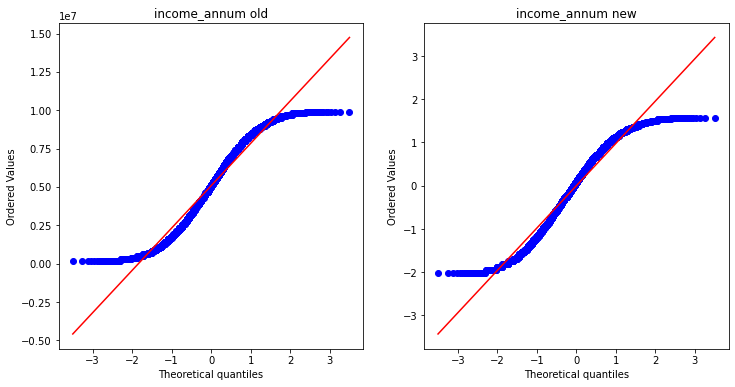

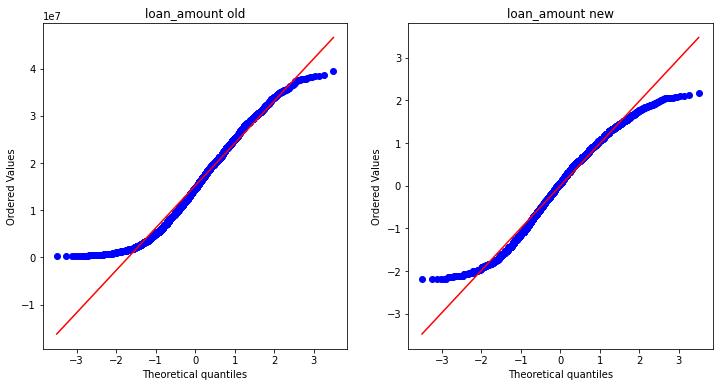

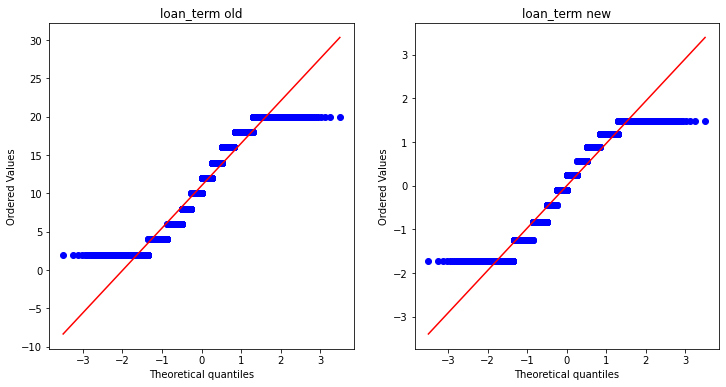

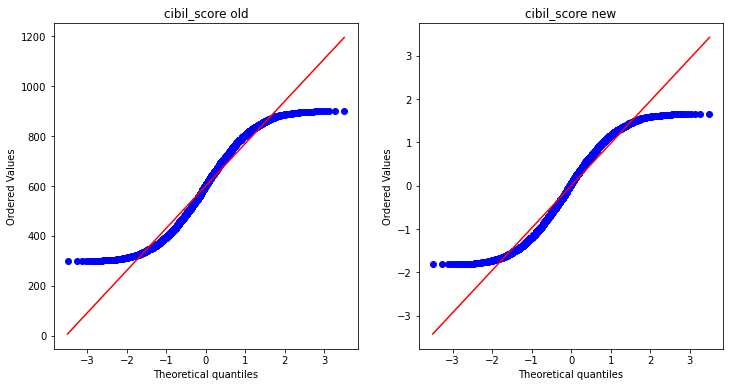

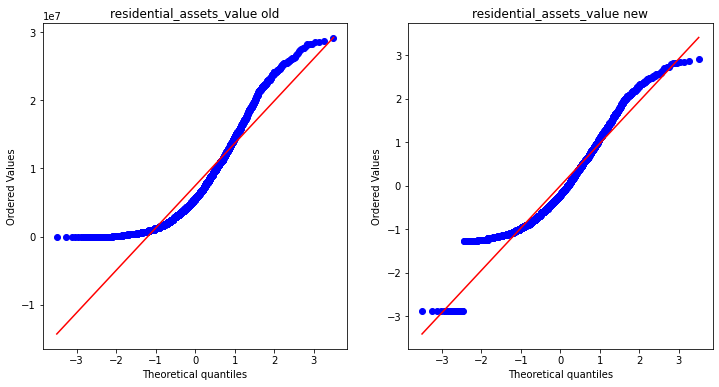

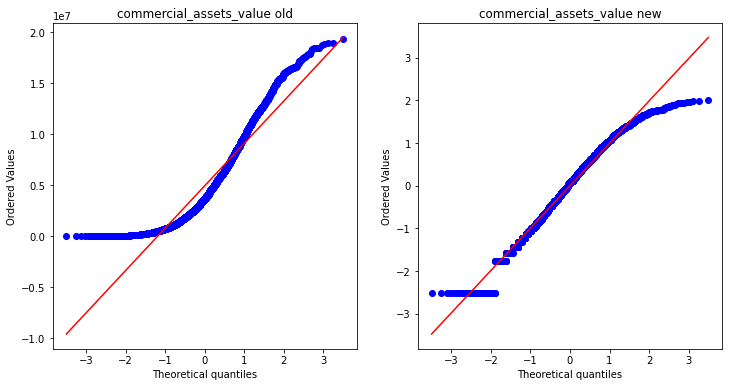

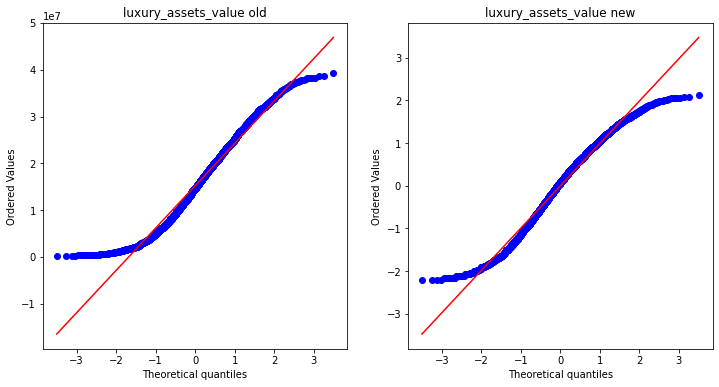

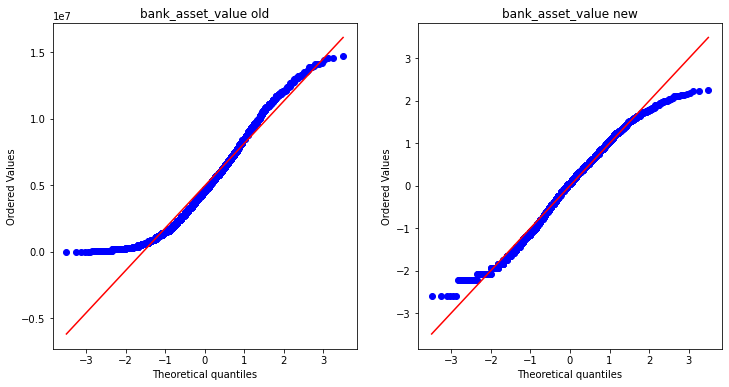

In [38]:
for x in X_train_transformed_2.columns:
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    stats.probplot(X_train_transformed[x],dist="norm",plot=plt)
    plt.title(x+' old')
    
    plt.subplot(122)
    stats.probplot(X_train_transformed_2[x],dist="norm",plot=plt)
    plt.title(x+' new')

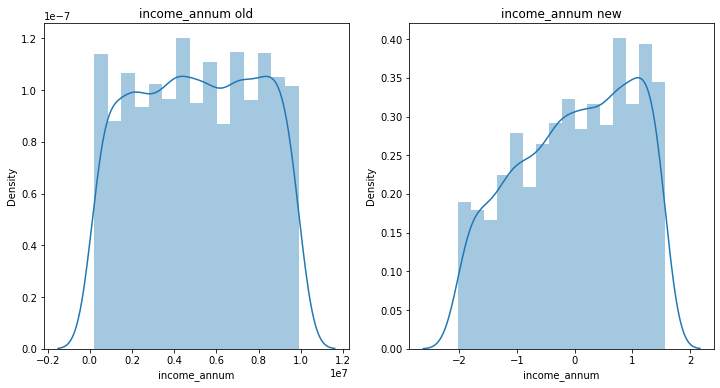

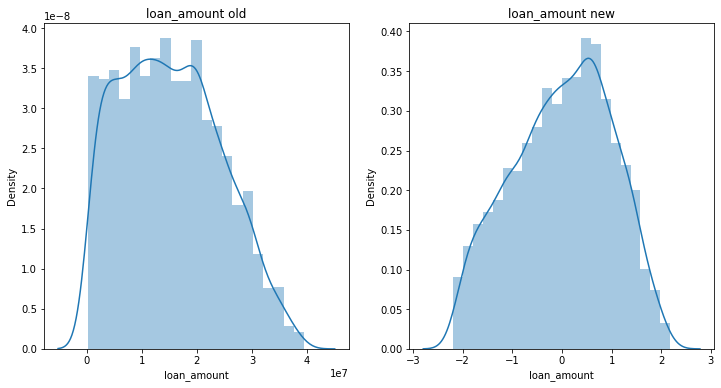

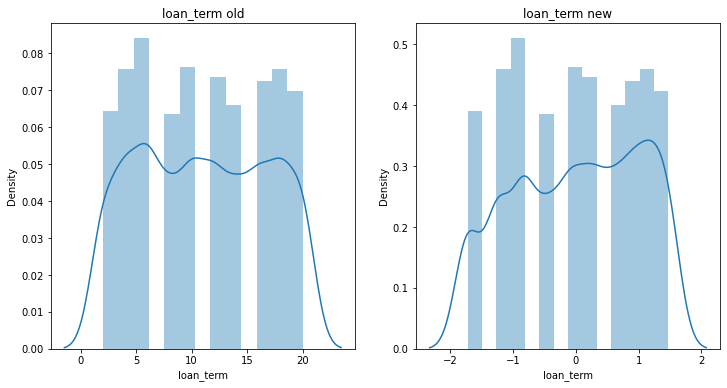

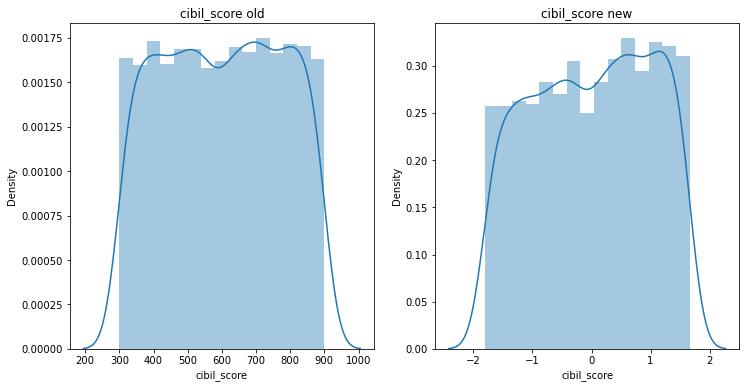

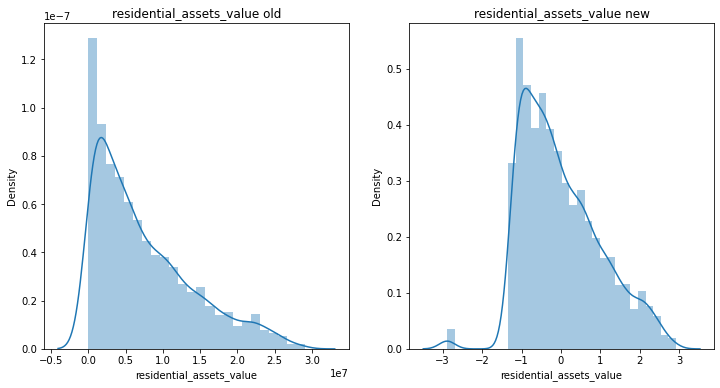

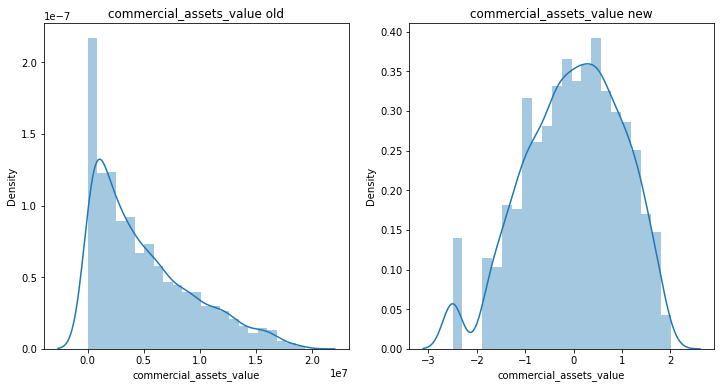

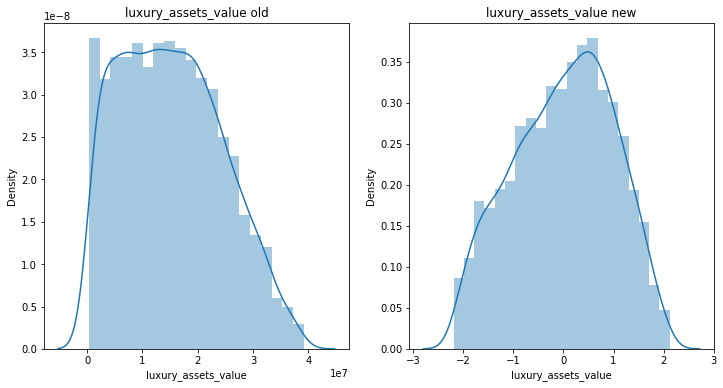

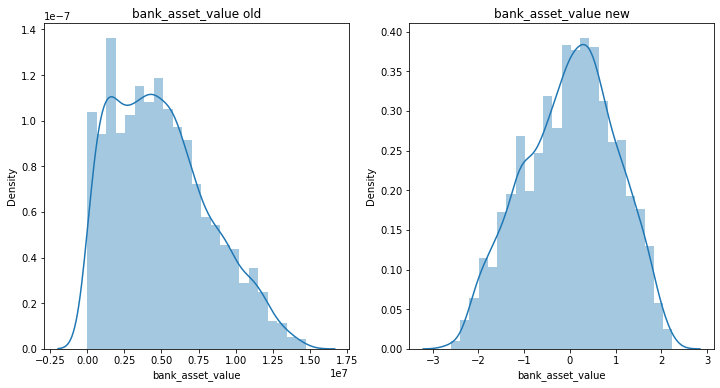

In [39]:
for x in X_train_transformed_2.columns:
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    sns.distplot(X_train_transformed[x])
    plt.title(x+' old')
    
    plt.subplot(122)
    sns.distplot(X_train_transformed_2[x])
    plt.title(x+' new')

* So, it seems like applying transformation could be useful for the following: 'loan_amount','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_assets_value'

In [40]:
trf_4 = ColumnTransformer([('PowerTransform',PowerTransformer(),[0,1,2,4,7])],remainder='passthrough')

In [41]:
trf_5 = LogisticRegression()

In [42]:
pipe = Pipeline([('trf_3',trf_3),
                ('trf_1',trf_1),
                ('trf_2',trf_2),
                ('trf_4',trf_4),
                ('trf_5',trf_5)])

In [43]:
from sklearn import set_config
set_config(display='diagram')

In [44]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf_3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('outlier_capping',
                                                  FunctionTransformer(func=<function cap_outliers at 0x0000013CAC419D30>),
                                                  [7, 8, 10])])),
                ('trf_1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ohe_dep_educ_emp',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [3, 4, 5])])),
                ('trf_2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Standardization',
                                                  StandardScaler(),
                                                  [7, 8, 9, 10, 11, 12, 13,
                                                   14])])),
                ('trf_4',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('PowerTransform',
                                                  PowerTransformer(),
                                                  [0, 1, 2, 4, 7])])),
                ('trf_5', LogisticRegression())])

In [45]:
y_pred = pipe.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8985167837626854

In [47]:
#This is an ongoing project, and I hope to add further to it. 